In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
np.random.seed(0)
import statsmodels.api as sm


In [2]:
data = pd.read_csv("/Users/rahulbangad/Downloads/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


#### EDA & Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [5]:
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#### Bayseian Inference (Prior & Posterior Plot)

/Users/rahulbangad/anaconda3/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.


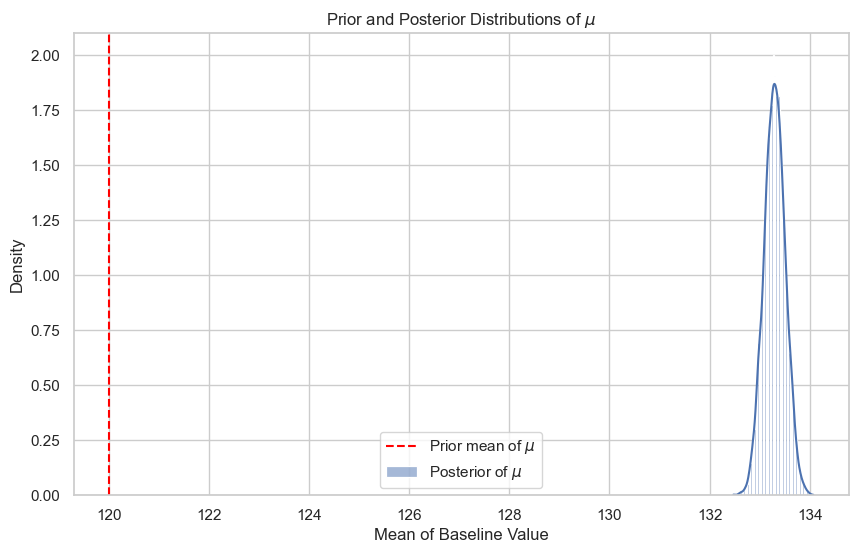

In [6]:
!pip install --upgrade theano-pymc
!pip install --upgrade pymc3


# Importing libraries 
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data1 = data['baseline value'].dropna().values

# Prior hyperparameters (mean and standard deviation)
mu_prior = 120
sigma_prior = 10

# Bayesian Inference using PyMC3
with pm.Model() as model:
    # Defining the prior
    mu = pm.Normal('mu', mu=mu_prior, sd=sigma_prior)
    
    # Likelihood (sampling distribution) of observations
    observed = pm.Normal('observed', mu=mu, sd=np.std(data1), observed=data1)
    
    # Drawing 2000 posterior samples
    trace = pm.sample(2000)

# Extracting the posterior samples for mu
posterior_mu = trace['mu']

# Plotting the prior and posterior distributions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(posterior_mu, kde=True, stat="density", label="Posterior of $\mu$")
plt.axvline(x=mu_prior, color='red', linestyle='--', label="Prior mean of $\mu$")
plt.xlabel("Mean of Baseline Value")
plt.ylabel("Density")
plt.title("Prior and Posterior Distributions of $\mu$")
plt.legend()
plt.show()


#### Hypothesis testing

In [7]:
import pandas as pd
from scipy import stats

# Let's say we want to test the hypothesis that the mean 'baseline value' is 120
# This is our null hypothesis: H0: mu = 120
# Our alternative hypothesis is: H1: mu != 120

# First, we extract the 'baseline value' data
baseline_values = data['baseline value']

# Perform a one-sample t-test against the hypothesized mean (120)
t_stat, p_value = stats.ttest_1samp(baseline_values, 120)

t_stat, p_value



(62.334264547564345, 0.0)

In [8]:
#### As p value is zero we can say that our null hypothesis is wrong 

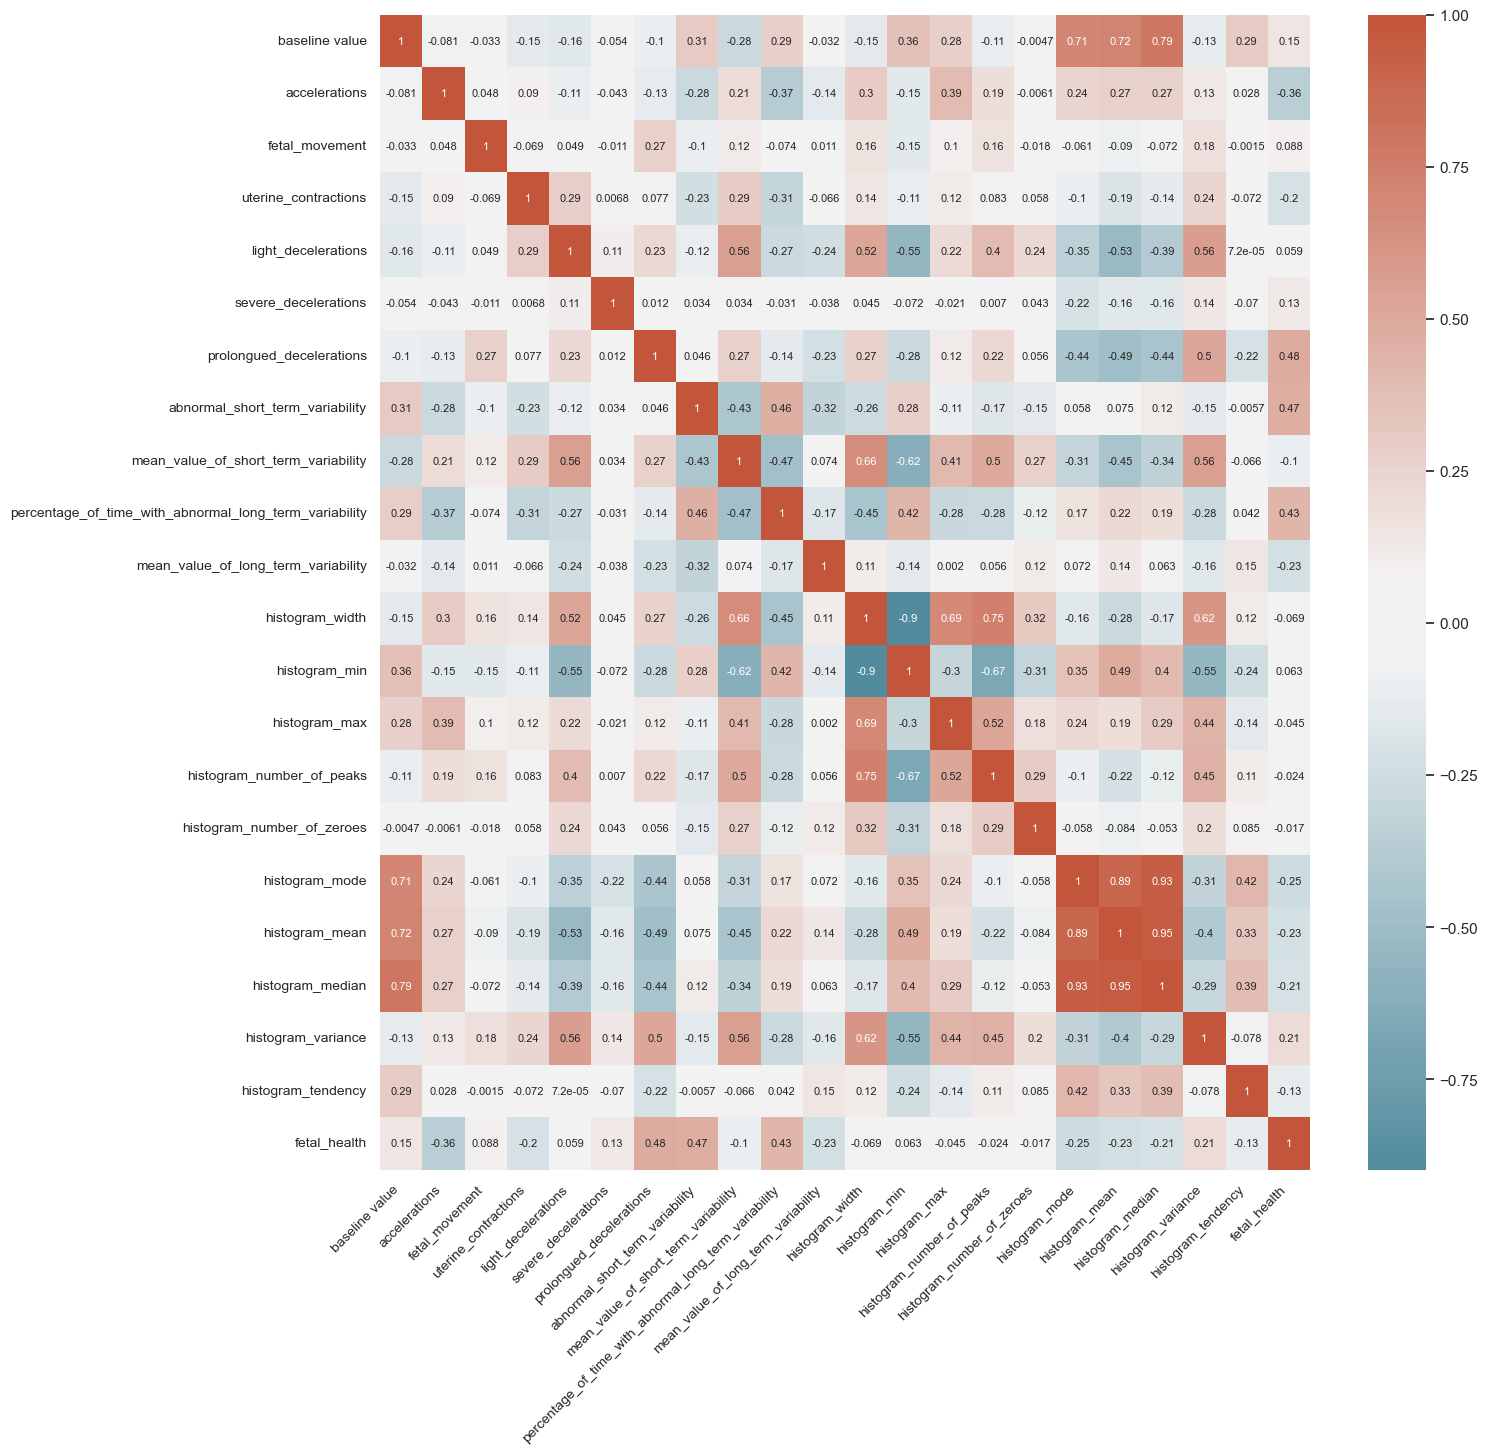

In [9]:
#correlation matrix

corrmat = data.corr()

# Set the size of the figure
plt.figure(figsize=(15,15))

# Create a diverging color palette
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

# Plot the heatmap with annotations
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0, annot_kws={"size": 8})

# Improve the visibility of the heatmap
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels and adjust font size
plt.yticks(fontsize=10)                           # Adjust font size of y labels

# Show the plot
plt.show()

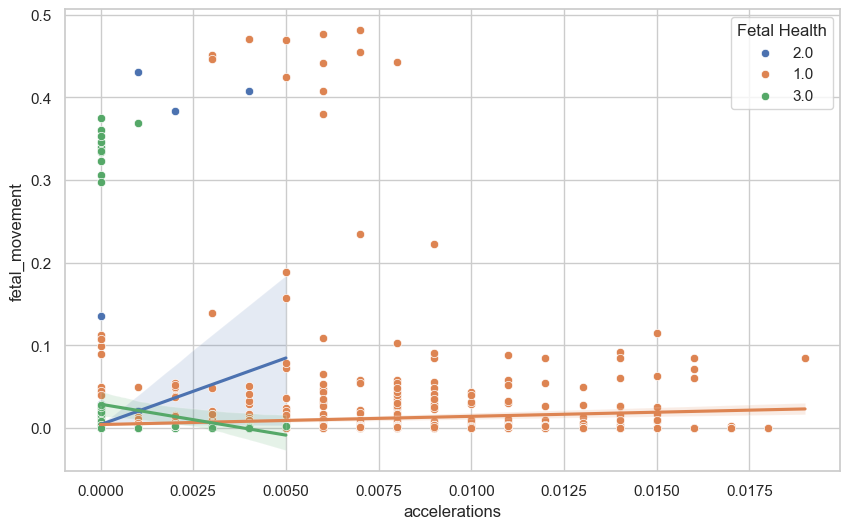

In [10]:
plt.figure(figsize=(10, 6))

# Unique categories in 'fetal_health'
categories = data['fetal_health'].unique()

# Plotting each category with a regression line
for category in categories:
    # Subset of data for the current category
    subset = data[data['fetal_health'] == category]
    
    # Scatter plot for the subset
    sns.scatterplot(data=subset, x='accelerations', y='fetal_movement', label=category)

    # Regression line for the subset
    sns.regplot(data=subset, x='accelerations', y='fetal_movement', scatter=False)

# Show the legend
plt.legend(title='Fetal Health', loc='upper right')

# Display the plot
plt.show()

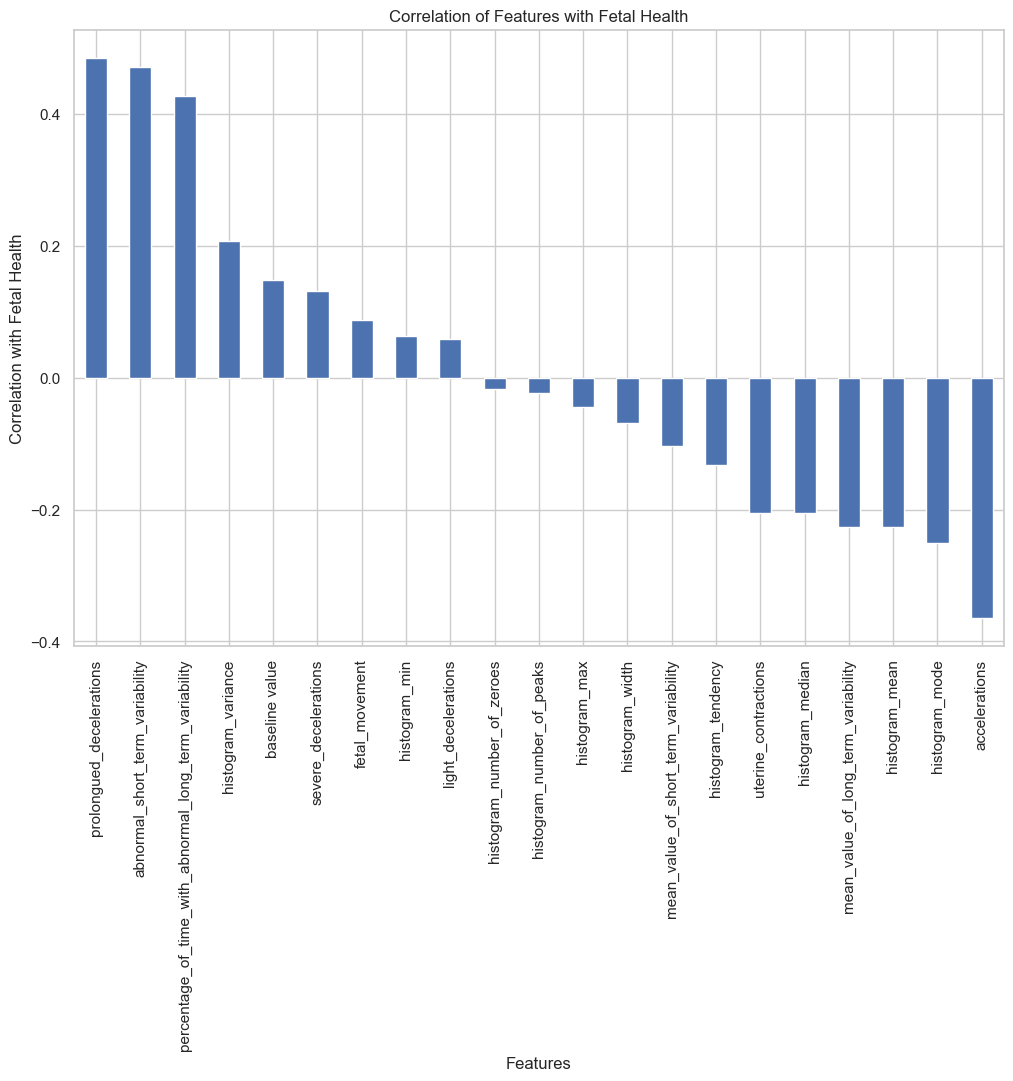

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [11]:


# Creating a correlation matrix with the target variable
correlation_matrix = data.corr()

# Extracting the correlations of each feature with the target variable 'fetal_health'
target_correlation = correlation_matrix['fetal_health'].sort_values(ascending=False)

# Creating a bar plot for the correlation of features with the target variable
plt.figure(figsize=(12, 8))
target_correlation.drop('fetal_health').plot(kind='bar')
plt.title('Correlation of Features with Fetal Health')
plt.xlabel('Features')
plt.ylabel('Correlation with Fetal Health')
plt.show()

target_correlation



In [12]:
# Dropping features with negative correlation with the target variable
features_to_drop = target_correlation[target_correlation < 0].index
fetal_data_reduced = data.drop(columns=features_to_drop)

In [13]:
fetal_data_reduced

,baseline value,fetal_movement,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_min,histogram_variance,fetal_health
0,120.0,0.000,0.000,0.0,0.0,73.0,43.0,62.0,73.0,2.0
1,132.0,0.000,0.003,0.0,0.0,17.0,0.0,68.0,12.0,1.0
2,133.0,0.000,0.003,0.0,0.0,16.0,0.0,68.0,13.0,1.0
3,134.0,0.000,0.003,0.0,0.0,16.0,0.0,53.0,13.0,1.0
4,132.0,0.000,0.000,0.0,0.0,16.0,0.0,53.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.0,0.0,79.0,25.0,137.0,2.0,2.0
2122,140.0,0.000,0.000,0.0,0.0,78.0,22.0,103.0,3.0,2.0
2123,140.0,0.000,0.000,0.0,0.0,79.0,20.0,103.0,4.0,2.0
2124,140.0,0.000,0.000,0.0,0.0,78.0,27.0,103.0,4.0,2.0


#### Model Building

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Preparing the data for the Logistic Regression model
X_reduced = fetal_data_reduced.drop('fetal_health', axis=1)
y_reduced = fetal_data_reduced['fetal_health']

# Splitting the dataset into train and test sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y_reduced, test_size=0.2, random_state=42)

# Model Training using Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_reduced, y_train_reduced)

# Model Evaluation
y_pred_reduced = logreg_model.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)


# Formatting the output for easier readability
formatted_output = {
    "Accuracy": accuracy_reduced,
    "Classification Report": "\n" + classification_report(y_test_reduced, y_pred_reduced)
}

formatted_output
print("Classification Report:")
print(formatted_output["Classification Report"])

accuracy_reduced







Classification Report:

              precision    recall  f1-score   support

         1.0       0.90      0.95      0.93       333
         2.0       0.71      0.50      0.59        64
         3.0       0.55      0.55      0.55        29

    accuracy                           0.86       426
   macro avg       0.72      0.67      0.69       426
weighted avg       0.85      0.86      0.85       426



0.8568075117370892

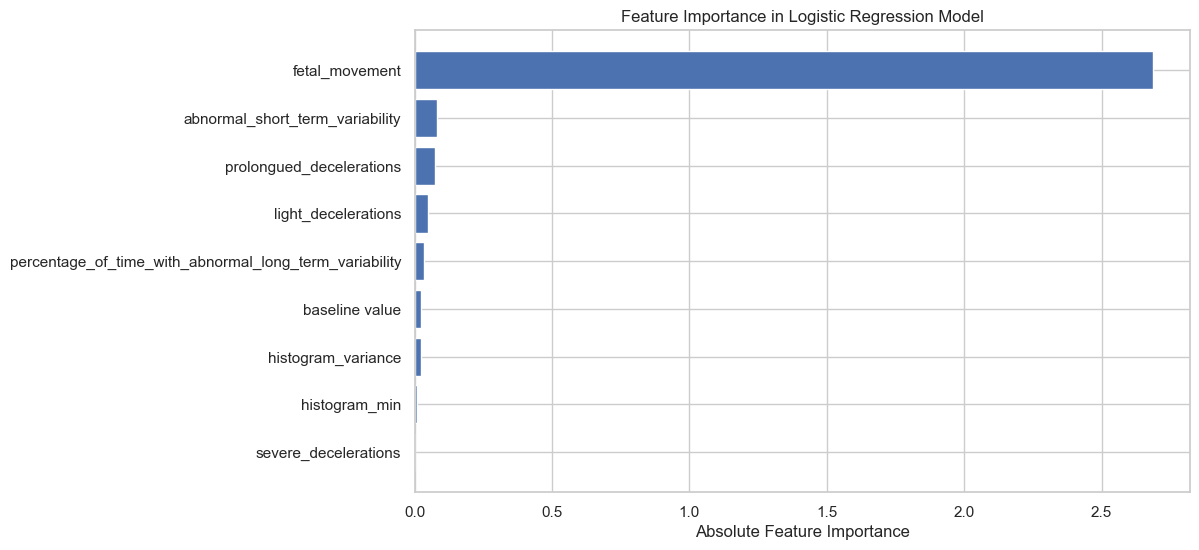

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'logreg_model' is your trained logistic regression model
# and 'X_train_reduced' contains your feature names

# Get the absolute values of coefficients from the model
feature_importance = np.abs(logreg_model.coef_[0])

# Sort the feature importances and their corresponding feature names
sorted_idx = np.argsort(feature_importance)
sorted_importance = feature_importance[sorted_idx]
sorted_features = X_train_reduced.columns[sorted_idx]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), sorted_importance, align='center')
plt.yticks(range(len(sorted_idx)), sorted_features)
plt.xlabel('Absolute Feature Importance')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

In [16]:
coefficients = logreg_model.coef_
coefficients

array([[-2.35839288e-02, -2.68666691e+00,  5.00853775e-02,
        -8.98695003e-04, -7.36887487e-02, -8.05598729e-02,
        -3.53137628e-02,  6.76084598e-03, -2.16107349e-02],
       [ 6.47084508e-02,  8.55699689e-01, -8.30699228e-02,
        -8.37803276e-05,  4.03057946e-03, -7.45177961e-03,
         6.29757786e-03,  4.91406849e-03, -1.45687814e-02],
       [-4.11245220e-02,  1.83096722e+00,  3.29845453e-02,
         9.82475331e-04,  6.96581693e-02,  8.80116525e-02,
         2.90161850e-02, -1.16749145e-02,  3.61795163e-02]])

In [17]:


# Create a list of tuples containing the classifier name and its corresponding pipeline
classifiers = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier()),
    ("SVC", SVC())
]

# Dictionary to hold the cross-validation results
cv_results_accuracy = {}

# Perform cross-validation and store the results
for name, classifier in classifiers:
    pipeline = Pipeline([(name, classifier)])
    pipeline.fit(X_reduced, y_reduced)  # Fit the pipeline
    cv_score = cross_val_score(pipeline, X_reduced, y_reduced, cv=10)
    cv_results_accuracy[name] = cv_score.mean()
    print(f"{name}: {cv_score.mean():.6f}")




Decision Tree: 0.817836
Random Forest: 0.857321
SVC: 0.823098


#### Conclusion

In [18]:
#### we can conclude by looking the accuracy that LR/Random forest are better than other models implemented